# 22k-4005 Mujtaba Saqib BAI-4A

In [1]:
!pip install scikit-learn

In [2]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

Classification Task with Breast Cancer Dataset:
 Load the Breast Cancer dataset (load_breast_cancer()) from sklearn.datasets.
 Split the dataset into training and testing sets.
 Implement a classification model (e.g., Logistic Regression, Decision Tree) to predict cancer diagnosis (malignant or benign).
 Evaluate the model's accuracy and other metrics.

In [6]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X,y = cancer.data, cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model=LogisticRegression()

model.fit(X_train, y_train)

y_pred=model.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)

print("Accuracy ",accuracy)

Accuracy  0.9649122807017544


C:\Users\mujta\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


2. Regression Task with Boston Housing Dataset:
 Load the Boston Housing dataset (load_boston()) from sklearn.datasets.
 Split the dataset into training and testing sets.
 Implement a regression model (e.g., Linear Regression, Random Forest) to predict house prices.
 Calculate and analyze the model's performance using metrics like mean squared error.

In [7]:
#ImportError: 
#`load_boston` has been removed from scikit-learn since version 1.2.

#The Boston housing prices dataset has an ethical problem: as
#investigated in [1], the authors of this dataset engineered a
#non-invertible variable "B" assuming that racial self-segregation had a
#positive impact on house prices [2]. Furthermore the goal of the
#research that led to the creation of this dataset was to study the
#impact of air quality but it did not give adequate demonstration of the
#validity of this assumption.

In [8]:
#hence used load_digit data
from sklearn.datasets import load_digits

digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

model=RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_pred, y_test)

print("accuracy Score ",accuracy)

accuracy Score  0.975


Clustering Task with Iris Dataset:
 Use the Iris dataset (load_iris()) from sklearn.datasets.
 Apply K-means clustering to group similar iris flowers based on their features.
 Visualize the clusters and compare them with the actual species labels.

In [9]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

C:\Users\mujta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mujta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


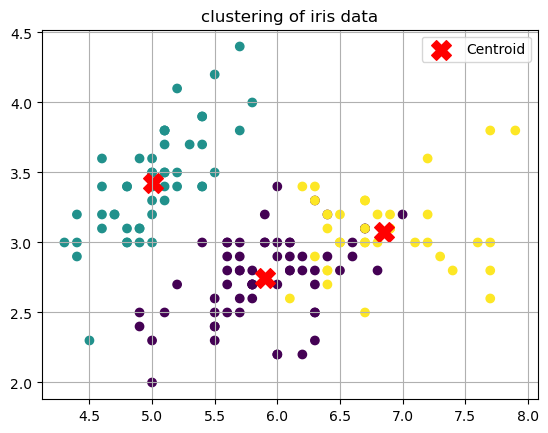

In [10]:
iris = load_iris()
X = iris.data
y = iris.target

kmeans = KMeans(n_clusters=3,random_state=0)
labels = kmeans.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='red', marker='X', label='Centroid')
plt.title("clustering of iris data")
plt.grid(True)
plt.legend()
plt.show()

Dimensionality Reduction Task with Wine Dataset:
 Load the Wine dataset (load_wine()) from sklearn.datasets.
 Apply PCA (Principal Component Analysis) or t-SNE (t-distributed Stochastic Neighbor Embedding) for dimensionality
reduction.
 Visualize the reduced-dimensional data and observe the separation of wine classes.

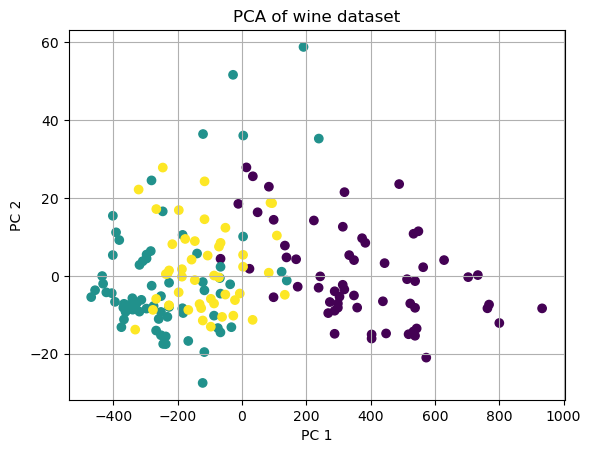

In [11]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine

wine = load_wine()

X = wine.data
y = wine.target

pca=PCA(n_components=2)
X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='viridis')
plt.title("PCA of wine dataset")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.grid(True)
plt.show()

*Advanced Tasks

1. Hyperparameter Tuning with Grid Search:
 Select any dataset and supervised learning algorithm (e.g., SVM, Random Forest).
 Use GridSearchCV to perform hyperparameter tuning by searching for the best combination of parameters.
 Evaluate the tuned model on a hold-out test set and compare it with the default model.

In [12]:
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV

iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

default_model = SVC(random_state=42)

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

grid_search = GridSearchCV(estimator=SVC(random_state=42), param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred_default = default_model.fit(X_train, y_train).predict(X_test)
y_pred_best = best_model.predict(X_test)

accuracy_default = accuracy_score(y_test, y_pred_default)
accuracy_best = accuracy_score(y_test, y_pred_best)

print("default model accuracy ", accuracy_default)
print("best model accuracy ", accuracy_best)
print("best model parameters ", grid_search.best_params_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
default model accuracy  1.0
best model accuracy  1.0
best model parameters  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


Ensemble Learning Task:
 Choose a classification or regression dataset (e.g., load_iris() or load_diabetes()).
 Implement an ensemble learning method such as Random Forest or Gradient Boosting.
 Compare the ensemble model's performance with individual base models.

In [25]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target

X_tain, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

regressor = RandomForestRegressor()

regressor.fit(X_tain,y_train)

y_pred= regressor.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("random forest regressor root mean squared ", rmse)
print("random forest regressor co-efficient of determination ", r2)

#for indivual base using decsion tree

tree = DecisionTreeRegressor()
tree.fit(X_tain,y_train)
y_pred=tree.predict(X_test)

rmse_tree = np.sqrt(mean_squared_error(y_test,y_pred))
r2_tree = r2_score(y_test,y_pred)

print("indivual base mode root mean squared ",rmse_tree)
print("indivual base mode co-efficient of determination ",rmse_tree)

random forest regressor root mean squared  55.70293465530773
random forest regressor co-efficient of determination  0.4143586147599071
indivual base mode root mean squared  67.2975949951767
indivual base mode co-efficient of determination  67.2975949951767


3. Flower Classification- Dataset: Use the Flowers Recognition dataset available from Kaggle, containing images of flowers categorized into different classes (e.g., daisy, tulip, rose, sunflower). Use any Supervised Algorithm to Perform Classification and Use Stramlit to Give the UI to the Classification Task.